[0.5621765008857981, 0.9990889488055994, 0.9998766054240137, 0.9999999979388463]


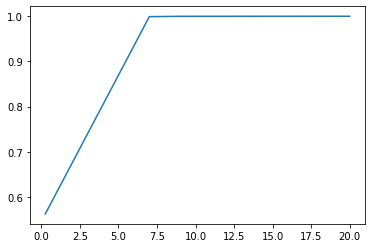

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xList = [0.25, 7, 9, 20]
yList = []

for x in xList:
    yList.append(1 / (1 + np.exp(-x)))

print(yList)

plt.plot(xList, yList)

In [14]:
import pandas as pd

roomCnt = [1, 2, 1, 1, 2, 1, 3, 4]  # 방 갯수
year = [2001, 1997, 1998, 2020, 1994, 1999, 2000, 2010]  # 건축년도
isRebuild = [1, 0, 0, 1, 1, 1, 1, 0]  # 재건축여부

df = pd.DataFrame({'방갯수': roomCnt, '건축년도': year, '재건축여부': isRebuild})

df['건축년도'] = df['건축년도'] / 2000  # scaling
df['건축년도'] = df['건축년도'].astype('int32')  # casting to int32

x = df[['방갯수', '건축년도']].values
y = df['재건축여부'].values
df

,방갯수,건축년도,재건축여부
0,1,1,1
1,2,0,0
2,1,0,0
3,1,1,1
4,2,0,1
5,1,0,1
6,3,1,1
7,4,1,0


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함
input_layer = tf.keras.layers.InputLayer(input_shape=(2, ))
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

model = keras.Sequential([input_layer, output_layer])
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
print(model.fit(x, y))
model.summary()

1/1 [==============================] - 0s 225ms/step - loss: 0.7385 - accuracy: 0.2500
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [17]:
tmp = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)(x)
tmp

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[0.43392915],
       [0.55593234],
       [0.5284483 ],
       [0.43392915],
       [0.55593234],
       [0.5284483 ],
       [0.48891923],
       [0.5165998 ]], dtype=float32)>

In [18]:
model.get_weights()

[array([[ 0.11075377],
        [-0.37975395]], dtype=float32),
 array([0.00316227], dtype=float32)]

In [19]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [21]:
w = model.get_weights()[0]
b = model.get_weights()[1]

1 / (1 + np.exp(-(np.dot(x, w) + b)))

array([[0.43392917],
       [0.55593238],
       [0.52844825],
       [0.43392917],
       [0.55593238],
       [0.52844825],
       [0.48891922],
       [0.51659974]])

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함
input_layer = tf.keras.layers.InputLayer(input_shape=(2, ))
hidden_layer = tf.keras.layers.Dense(units=1, activation='relu')
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

model = keras.Sequential([input_layer, hidden_layer, output_layer])
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
print(model.fit(x, y))
model.summary()

1/1 [==============================] - 0s 216ms/step - loss: 0.6920 - accuracy: 0.3750
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [25]:
tmp = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)(x)
tmp

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[0.        ],
       [0.22466981],
       [0.11391602],
       [0.        ],
       [0.22466981],
       [0.11391602],
       [0.        ],
       [0.06642342]], dtype=float32)>

In [26]:
model.get_weights()

[array([[ 0.11075378],
        [-0.37975395]], dtype=float32),
 array([0.00316224], dtype=float32),
 array([[-0.60811526]], dtype=float32),
 array([0.00316227], dtype=float32)]

In [27]:
tmp = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)(x)
tmp

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[0.5007906 ],
       [0.46668372],
       [0.48347807],
       [0.5007906 ],
       [0.46668372],
       [0.48347807],
       [0.5007906 ],
       [0.49069336]], dtype=float32)>

In [28]:
model.predict(x)

1/1 [==============================] - 0s 44ms/step


array([[0.5007906 ],
       [0.46668372],
       [0.48347807],
       [0.5007906 ],
       [0.46668372],
       [0.48347807],
       [0.5007906 ],
       [0.49069336]], dtype=float32)

In [29]:
model.evaluate(x, y)

1/1 [==============================] - 0s 75ms/step - loss: 0.6909 - accuracy: 0.7500


[0.6909422874450684, 0.75]

In [30]:
yhat = model.predict(x)
y = y.reshape(8, 1)
err = y * np.log(yhat) + (1 - y) * np.log(1 - yhat)
-np.mean(err)

1/1 [==============================] - 0s 10ms/step


0.6909422129392624